# Proyecto 2-Parte I (Core)

Dataset De Advertising Spend vs Sales: [Link en Kaggle](https://www.kaggle.com/datasets/brsahan/advertising-spend-vs-sales)

In [1]:
import pandas as pd


camino_ds = "../data/dataset1_ads.csv"
df = pd.read_csv(camino_ds)

## EDA

### Descripción del Conjunto de Datos

Este conjunto de datos explora la relación entre los gastos en publicidad en varios canales (TV, radio y periódicos) y el desempeño de las ventas. Proporciona información sobre cómo los diferentes tipos de inversión publicitaria impactan las ventas de productos, lo que permite realizar análisis de la eficacia del marketing basados ​​en datos. Este conjunto de datos se utiliza comúnmente para el análisis de regresión lineal para determinar la influencia de cada canal publicitario en los resultados de ventas.

Columnas:
* TV: Cantidad gastada en publicidad en TV por cada periodo.
* radio: Cantidad gastada en publicidad por cada periodo.
* newspaper: Cantidad gastada en periódicos por cada periodo.
* sales: Total de ventas generadas por fila.

### Análisis estadístico descriptivo.

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

In [2]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
TV,200.0,0.7,296.4,147.0425,85.854236,149.75,0.583874
radio,200.0,0.0,49.6,23.2640,14.846809,22.90,0.638188
newspaper,200.0,0.3,114.0,30.5540,21.778621,25.75,0.712791
sales,200.0,1.6,27.0,14.0225,5.217457,12.90,0.372077


Podemos ver que en todos los campos la Desviación estándar es muy alta, por lo cual la la mediana es mas útil para analizar este dataset.

#### Analizar la distribución de las variables categóricas.

No existen variables categóricas en este dataset, pero solo para confirmar, se buscan dichas variables.

In [3]:
from utils.eda_utils import obtener_columnas_categoricas_df


obtener_columnas_categoricas_df(df)

[]

### Visualizaciones.

#### Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

##### Histogramas

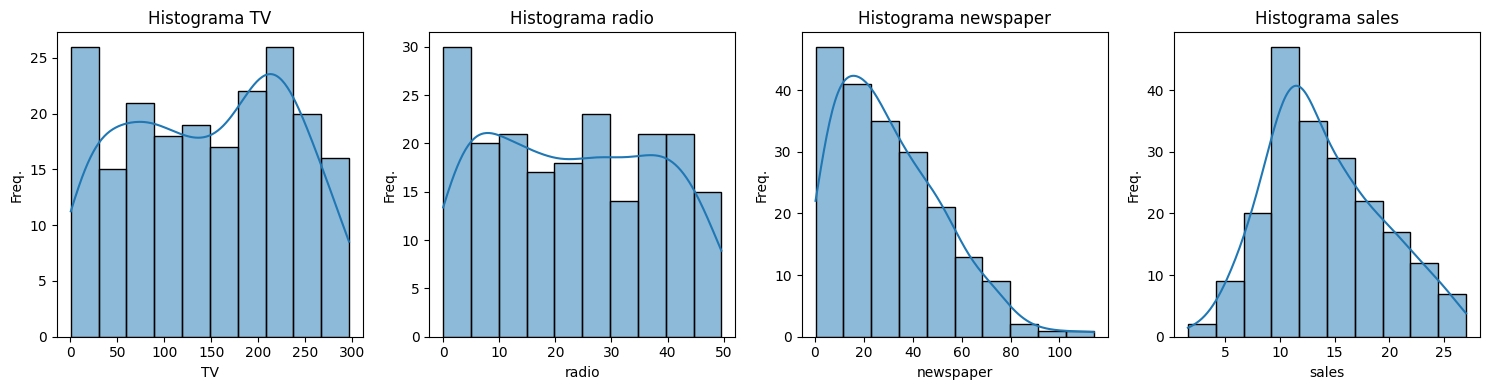

In [4]:
from utils.eda_utils import graficar_histogramas
from utils.eda_utils import obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=4, bins=10, kde=True, figsize=(15, 4))

De todos estos gráficos, podemos notar que con excepción de la columna sales, las demás variables no parecen seguir una distribución normal.

##### Boxplots

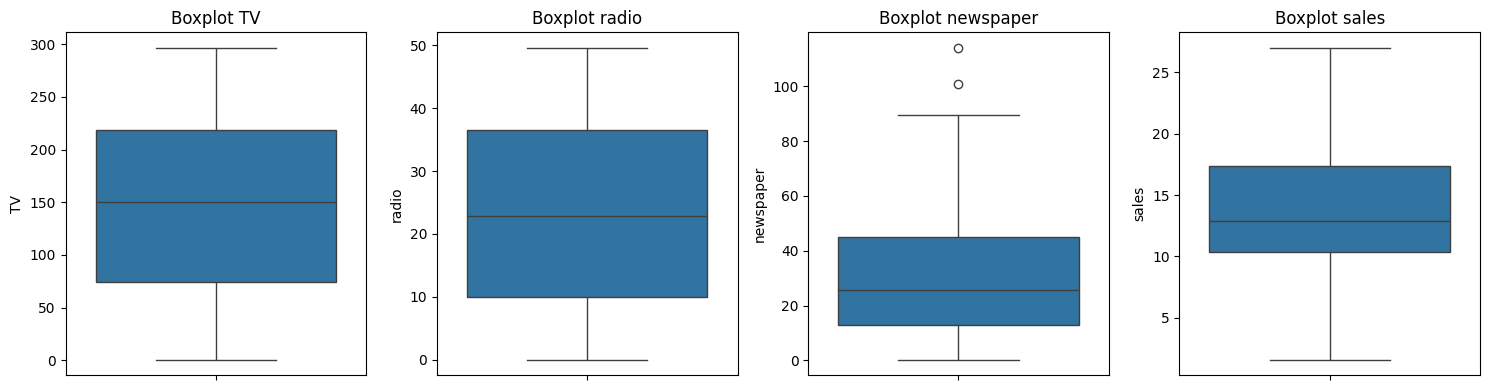

In [5]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 4))

Podemos notar de los boxplots que TV y radio tienen una distribución centrada en la mediana. Este no es el caso con newspaper y sales, y también se pueden visualizar algunos outliers en la columna newspaper. Para tener en cuenta al momento de elegir un escalador.

#### Visualizar las correlaciones entre variables (mapa de calor de correlación).

##### Gráficos de dispersión de todos los campos vs columna sales

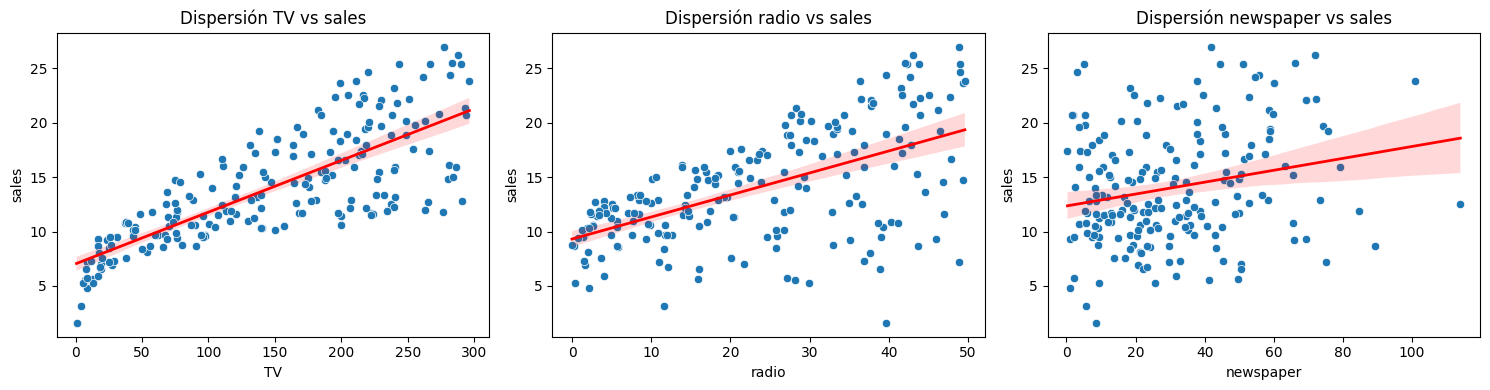

In [6]:
from utils.eda_utils import graficar_dispersiones


graficar_dispersiones(df, ["TV", "radio", "newspaper"], "sales", figsize=(15, 4))

De los gráficos de dispersión, podemos notar que el que mayor influencia tiene en las ventas es TV, seguido de radio. No obstante, no parece que haya mucha relación entre newspaper y sales.

##### Heatmap

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


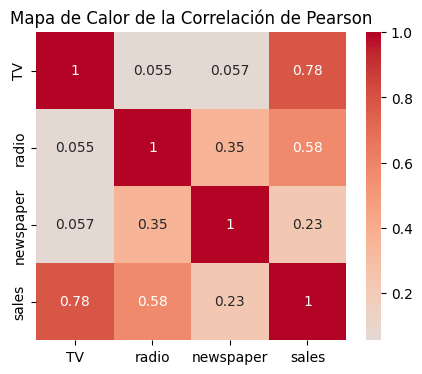

In [8]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas, figsize=(5, 4))

Al igual que en los gráficos de dispersión. Podemos notar que los campos TV y radio influyen bastante en las ventas.

### Identificación de Valores Nulos y Outliers:

#### Detectar valores nulos y discutir cómo podrían ser tratados.

In [9]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
TV,200,0,0.0
radio,200,0,0.0
newspaper,200,0,0.0
sales,200,0,0.0


No existen valores nulos en este dataset, por lo que no será necesario tratarlos.

#### Identificar outliers y evaluar su impacto potencial en el análisis.

In [11]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
TV,0.0,0.0,-142.3000,435.5000
radio,0.0,0.0,-29.8500,76.3500
newspaper,2.0,1.0,-35.7750,93.6250
sales,0.0,0.0,-0.1625,27.9375


Solamente existen dos outliers en el dataset, en la columna newspaper, por lo que su impacto no debe ser muy grande. De igual manera, se deben tener en cuenta al momento de elegir los escaladores.

### Resumen de Hallazgos:

Del EDA, se puede destacar lo siguiente

* El dataset es bueno para aplicar métodos de regresión, ya que solamente posee columnas numéricas.
* Según los histogramas, se puede notar que varias columnas no siguen una distribución estándar, por lo que se debe tener en cuenta en el escalado
* No existen muchos outliers, con la excepción de en la columna newspaper
* Existen correlaciones fuertes entre las columnas TV y radio en la cantidad de ventas, no tanto así en la columna de newspaper